In [3]:
# Numerical libraries
import numpy as np   

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 
import matplotlib.style
plt.style.use('classic')

from scipy import stats

#importing seaborn for statistical plots
import seaborn as sns

# Import and store the data in a data frame

In [4]:
# reading the CSV file into pandas dataframe
airline = pd.read_csv("airline.csv")
airline.head()

,City1,City2,Average Fare,Distance,Average weekly passengers,market leading airline,market share1,Average fare,Low price airline,market share2,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


## Remove the outliers from the data

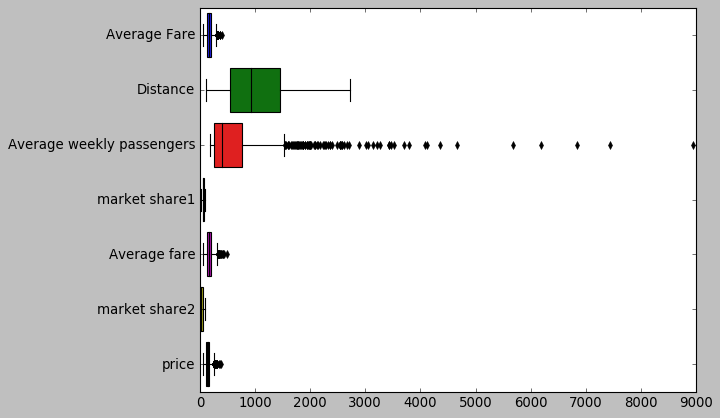

In [7]:
sns.boxplot(data=airline,orient="h")

In [8]:
# excluding categorical columns to find outliers based on continuous columns
fiteredairline = airline.select_dtypes(exclude='object')
fiteredairline
Q1 = fiteredairline.quantile(0.25)
Q3 = fiteredairline.quantile(0.75)
IQR = Q3 - Q1
dfairline = airline[~((fiteredairline < (Q1 - 1.5 * IQR)) |(fiteredairline > (Q3 + 1.5 * IQR))).any(axis=1)]
print(dfairline.shape)
# number of rows are less due to removal of outliers using IQR strategy

(885, 11)


# Treat “Average Fare” – 3rdColumn as your Dependent Variable and Rest of the columns as Independent Variable

In [9]:
y = dfairline[['Average Fare']]
x = dfairline[['Distance', 'Average weekly passengers','market share1','Average fare','market share2','price']]

# Drop the independent variables which has less than 0.1 correlation with the dependent variable

In [10]:
cols = x.corrwith(y["Average Fare"]) < 0.1
print(cols)
# dropping columns which has correlation less then 0.1
x.drop(['Average weekly passengers', 'market share1','market share2'], axis=1, inplace=True)
x.head()

Distance                     False
Average weekly passengers     True
market share1                 True
Average fare                 False
market share2                 True
price                        False
dtype: bool


C:\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Distance,Average fare,price
0,528,111.03,111.03
1,860,123.09,118.94
2,852,223.98,167.12
3,288,68.86,68.86
4,723,161.36,145.42


# Create scatter Plot of Independent Variable vs Dependent Variable

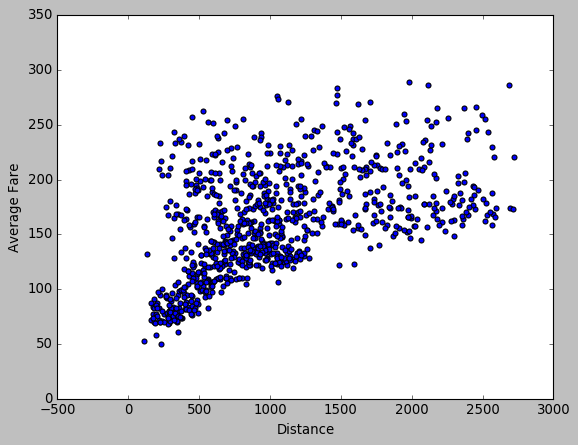

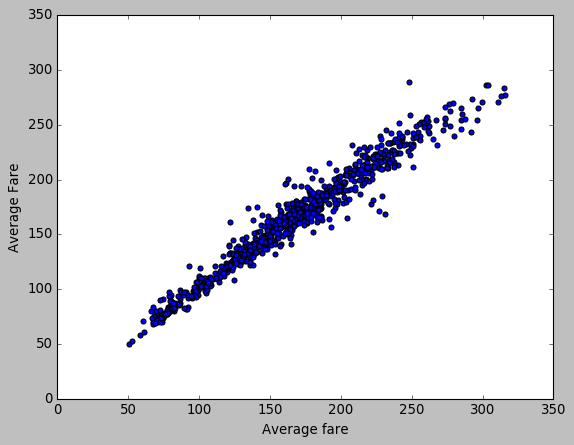

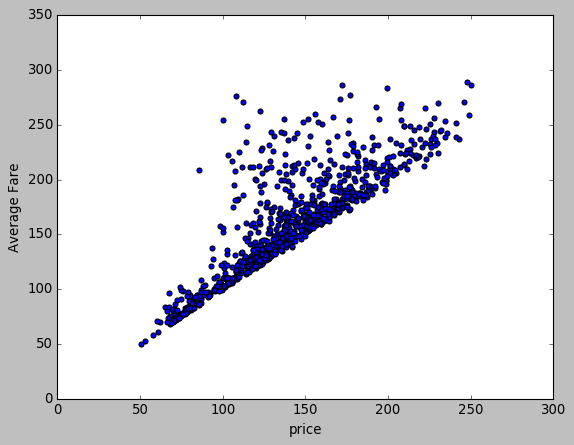

In [11]:
plt.scatter(x['Distance'],y['Average Fare'])
plt.ylabel('Average Fare')
plt.xlabel('Distance')
plt.show()

plt.scatter(x['Average fare'],y['Average Fare'])
plt.ylabel('Average Fare')
plt.xlabel('Average fare')
plt.show()

plt.scatter(x['price'],y['Average Fare'])
plt.ylabel('Average Fare')
plt.xlabel('price')
plt.show()

# Divide the data set into training and test data set and build a Multiple Linear Regression model

In [12]:
from sklearn.model_selection import train_test_split
# Split x and y into training and test set in 70:30 ratio
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30 , random_state=1)
print(x_train.shape)
print(y_train.shape)
# invoke the LinearRegression function
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

(619, 3)
(619, 1)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

# Print the coefficients & intercepts of the linear regression model

In [13]:
# The coefficients
print('Coefficients: \n ', regression_model.coef_)
print('Intercepts: \n ', regression_model.intercept_)

Coefficients: 
  [[0.00166179 0.75550631 0.21196994]]
Intercepts: 
  [5.74263366]


# Print the accuracy of the overall model

Score for Train dataset:
 0.9695547782563688
Score for Test dataset:
 0.9739225973080645
RMSE:
 7.9183171555679435
R Square: 
 0.9739225973080644


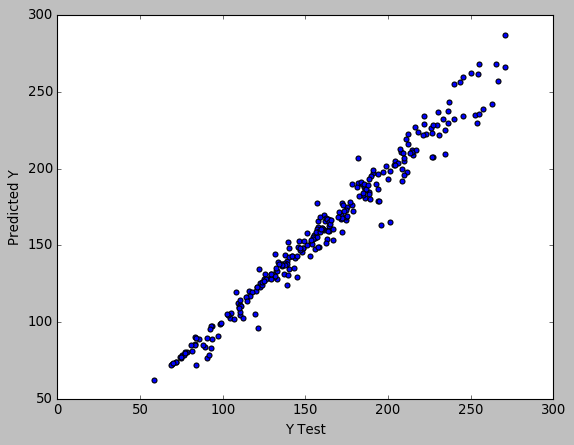

In [14]:
print("Score for Train dataset:\n",regression_model.score(x_train, y_train))
print("Score for Test dataset:\n",regression_model.score(x_test, y_test))

y_pred = regression_model.predict(x_test)
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

from sklearn import metrics

# Lower value of RMSE indicate better fit
print('RMSE:\n', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Since R2 is close to one we can claim that model is good
print("R Square: \n", metrics.r2_score(y_test,y_pred))
